## import library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## loading the dataset

In [13]:
df= pd.read_csv(r"C:/Users/MDTAN/OneDrive/Desktop/Grashtech.pvt.ltd/DAta set/Global_Superstore2.csv",encoding='unicode_escape')

## Explorstory data  Analysis

In [55]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Years,Top 5 State
0,32298,CA-2012-124891,31-07-2012,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,2012,NaN
1,26341,IN-2013-77878,05-02-2013,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2013,NaN
2,25330,IN-2013-71249,17-10-2013,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,2013,NaN


In [184]:
df.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.4,0.0,Medium
51289,6147,MX-2012-134460,22-05-2012,26-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.0,1.8,0.0,High


In [54]:
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

In [17]:
df.shape

(51290, 24)

In [186]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [188]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [189]:
df["Postal Code"].fillna(df["Postal Code"].mean(),inplace=True)

## Count of Order Priority

In [190]:
df["Order Priority"].value_counts()

Order Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

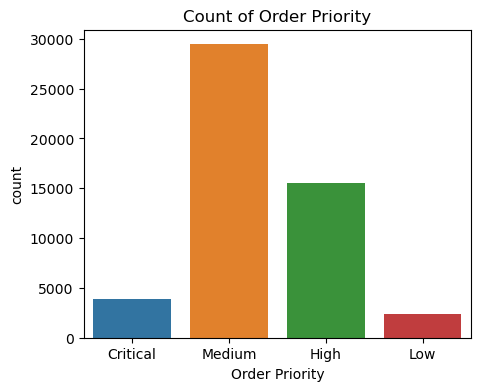

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=df)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

## Count of Ship Mode

In [191]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [193]:
x=df["Ship Mode"].value_counts().index
y=df["Ship Mode"].value_counts().values

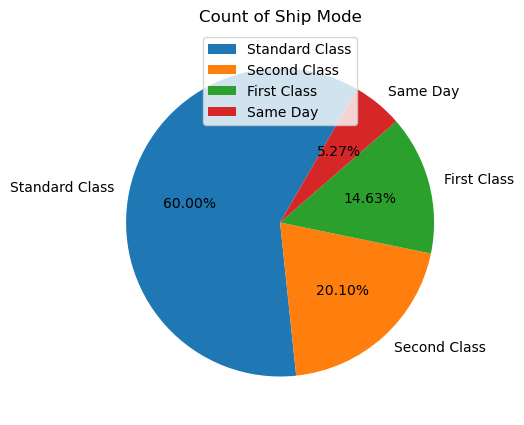

In [194]:
plt.figure(figsize=(6,5))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=9)
plt.title("Count of Ship Mode")
plt.savefig("Count of Ship Mode.jpg")
plt.show()

## Count of Category

In [195]:
df["Category"].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

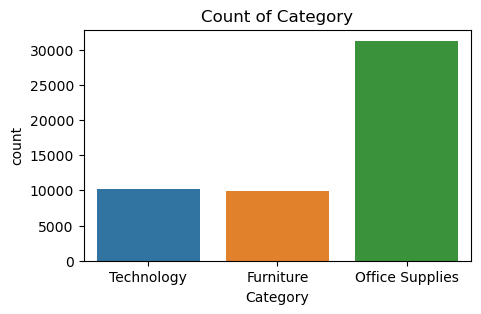

In [255]:
plt.figure(figsize=(5,3))
sns.countplot(x="Category",data=df)
plt.title("Count of Category")
plt.savefig("Count of Category.jpg")
plt.show()

## Office Supplies VS Sub-Category

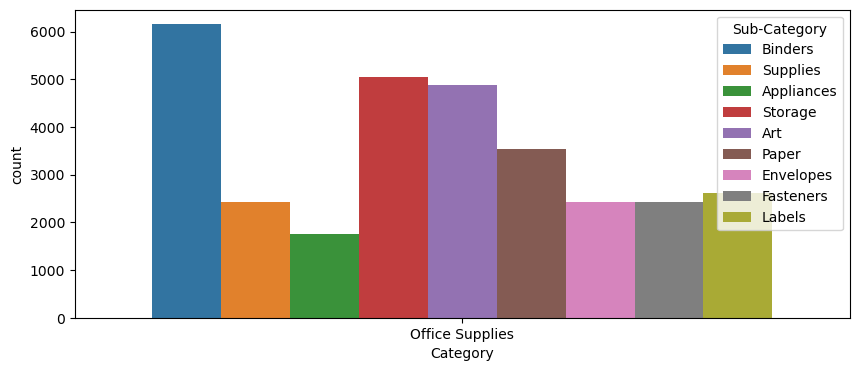

In [56]:
plt.figure(figsize=(10,4))
sns.countplot(x="Category",data=df[df["Category"]=="Office Supplies"],hue="Sub-Category")
plt.savefig("Count of Category.jpg")
plt.show()

## Technology VS Sub-Category

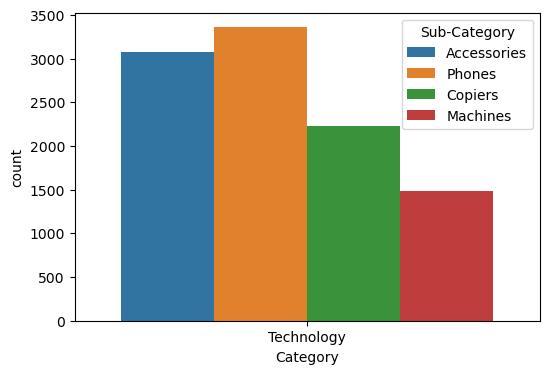

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="Category",data=df[df["Category"]=="Technology"],hue="Sub-Category")
plt.savefig("Count of Category.jpg")
plt.show()

## Furniture VS Sub-Category

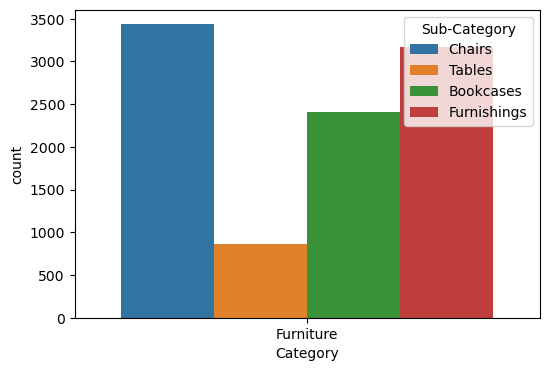

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x="Category",data=df[df["Category"]=="Furniture"],hue="Sub-Category")

plt.show()

## Top 10 State by orders

In [67]:
df["State"].value_counts()[:10]

State
California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: count, dtype: int64

## Ship Mode VS Category

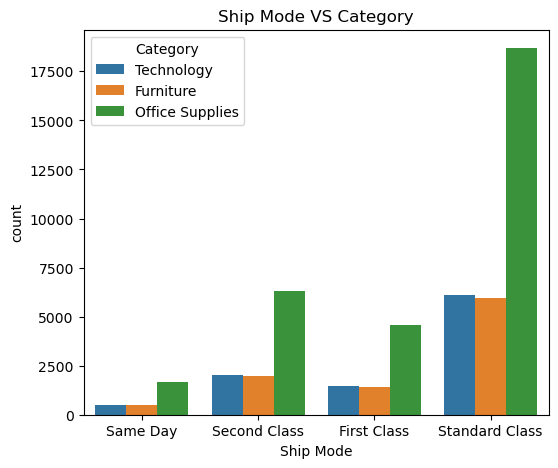

In [249]:
plt.figure(figsize=(6,5))
sns.countplot(x="Ship Mode",data=df,hue="Category")
plt.title("Ship Mode VS Category")
plt.show()

## Count of Segmenet

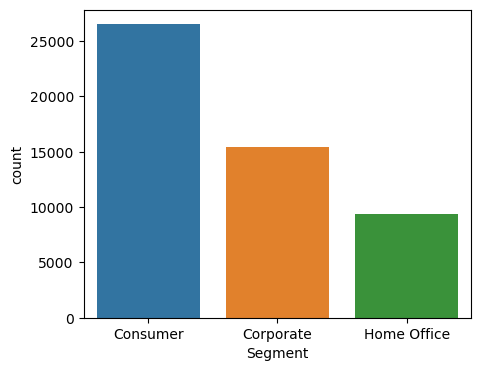

In [250]:
plt.figure(figsize=(5,4))
sns.countplot(x="Segment",data=df)
plt.show()

## Order in Years

In [21]:
df["Order Years"]=df["Ship Date"].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

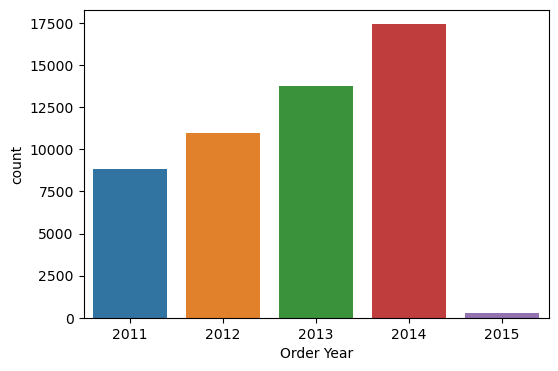

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Year",data=df)
plt.show()

## Sum of Profit by Category

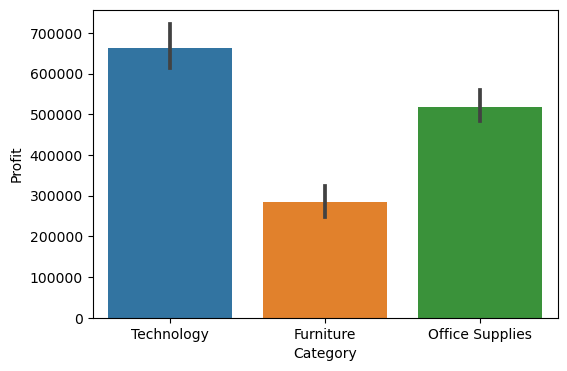

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x="Category",y="Profit",data=df,estimator="sum")
plt.show()

## Sum of Profit by Order Year

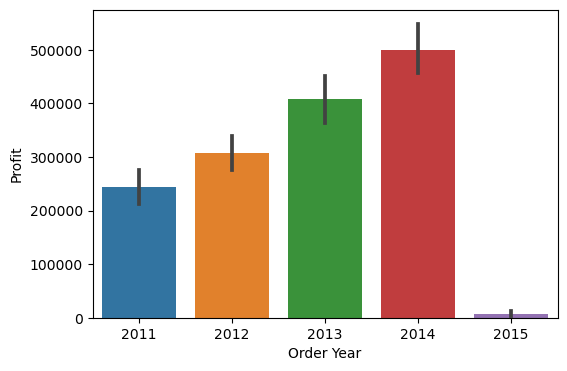

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x="Order Year",y="Profit",data=df,estimator="sum")
plt.show()